# Particle Identification from Detector Responses
### Distinguish between 4 different kinds of particles based on 6 detector signals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('pid-5M.csv')  


In [2]:
print(df.head())
print(df.info())

     id         p     theta      beta  nphe       ein      eout
0   211  0.780041  1.081480  0.989962     0  0.000000  0.000000
1   211  0.260929  0.778892  0.902450     0  0.000000  0.000000
2  2212  0.773022  0.185953  0.642428     4  0.101900  0.000000
3   211  0.476997  0.445561  0.951471     0  0.000000  0.000000
4  2212  2.123290  0.337332  0.908652     0  0.034379  0.049256
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   p       float64
 2   theta   float64
 3   beta    float64
 4   nphe    int64  
 5   ein     float64
 6   eout    float64
dtypes: float64(5), int64(2)
memory usage: 267.0 MB
None


In [3]:
print(df.describe())
print(df.isnull().sum()) 

                 id             p         theta          beta          nphe  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   9.941839e+02  1.230053e+00  4.889321e-01  8.995796e-01  3.575243e+00   
std    9.724034e+02  7.414895e-01  2.942161e-01  1.132321e-01  1.779236e+01   
min   -1.100000e+01  2.101170e-01  9.222140e-02  5.500010e-01  0.000000e+00   
25%    2.110000e+02  6.657510e-01  2.817420e-01  8.378760e-01  0.000000e+00   
50%    2.110000e+02  1.066150e+00  4.048670e-01  9.461940e-01  0.000000e+00   
75%    2.212000e+03  1.649650e+00  6.117800e-01  9.855910e-01  0.000000e+00   
max    2.212000e+03  5.286950e+00  2.219270e+00  1.499590e+00  3.490000e+02   

                ein          eout  
count  5.000000e+06  5.000000e+06  
mean   5.635883e-02  7.033195e-02  
std    7.882675e-02  1.020604e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    3.442440e-02  4.417490e-02  
75%    6.834520e-02  9.365990e-02  


## Class Distribution

id
 211     2806833
 2212    1945849
 321      232471
-11        14847
Name: count, dtype: int64


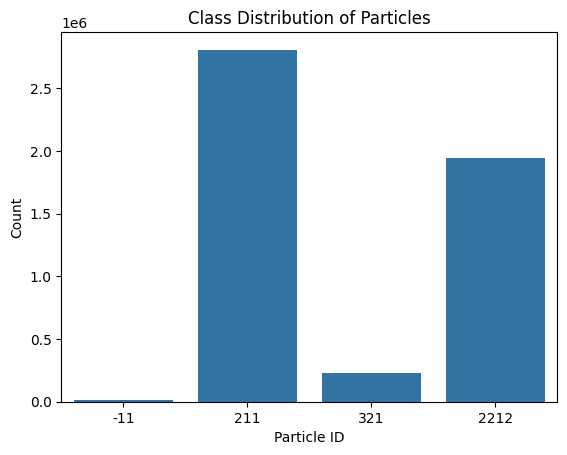

In [4]:
# Particle ID label
print(df['id'].value_counts())

sns.countplot(data=df, x='id')
plt.title('Class Distribution of Particles')
plt.xlabel('Particle ID')
plt.ylabel('Count')
plt.show()


## Check Detector Features

In [5]:
detector_columns = df.columns[df.columns != 'id']
print("Detector columns:", detector_columns.tolist())

# Basic statistics
df[detector_columns].describe()

Detector columns: ['p', 'theta', 'beta', 'nphe', 'ein', 'eout']


,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


## Zero Value Detection
#### Some detectors may have many 0s due to inefficiencies

p         0.00000
theta     0.00000
beta      0.00000
nphe     93.51718
ein      34.80742
eout     43.78022
dtype: float64


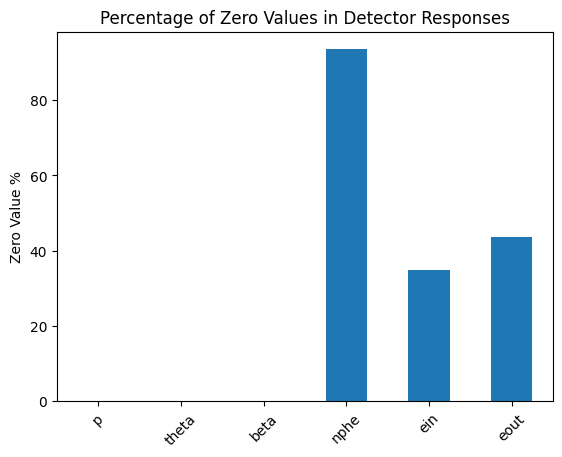

In [6]:
zero_percent = (df[detector_columns] == 0).sum() / len(df) * 100
print(zero_percent)

zero_percent.plot(kind='bar', title='Percentage of Zero Values in Detector Responses')
plt.ylabel('Zero Value %')
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap

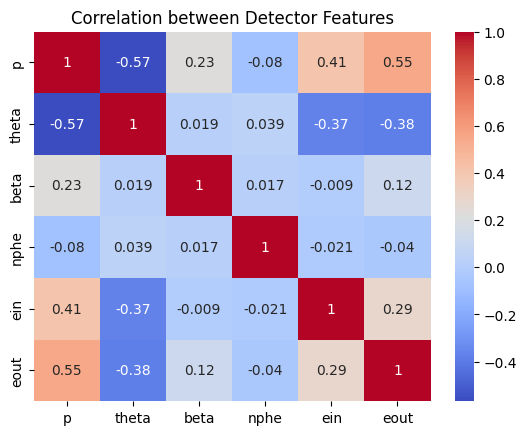

In [7]:
corr = df[detector_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Detector Features')
plt.show()


## Visualizing Detector Responses per Particle Type

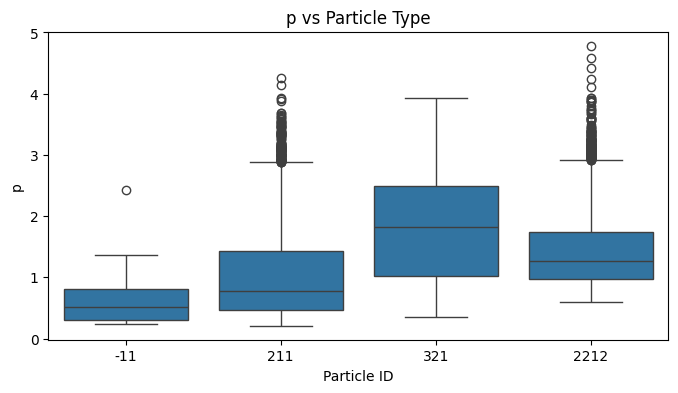

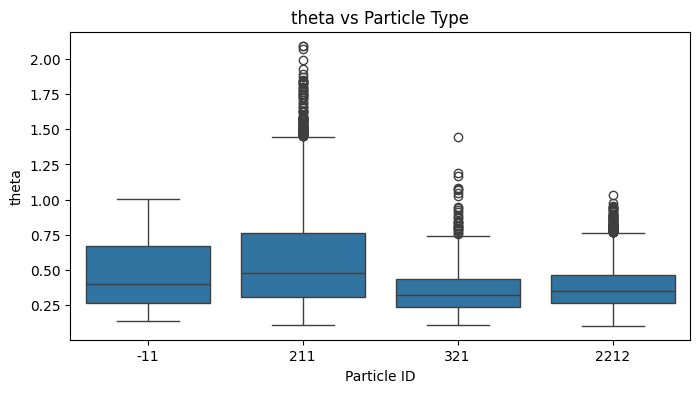

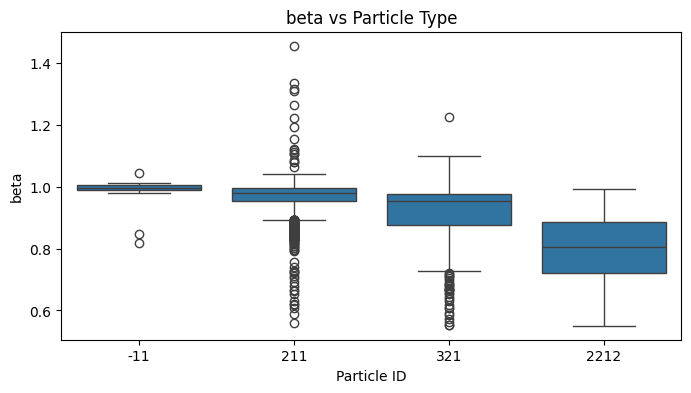

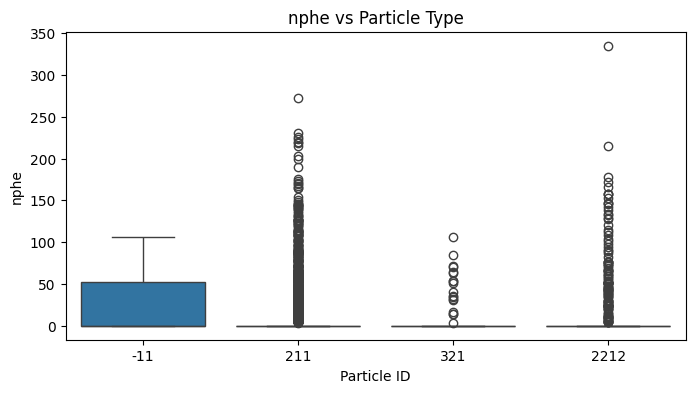

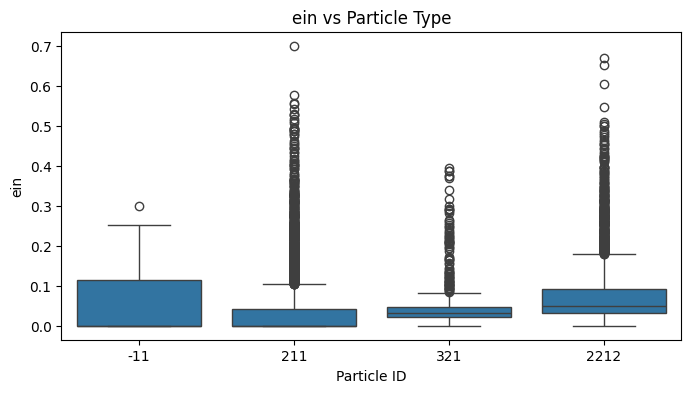

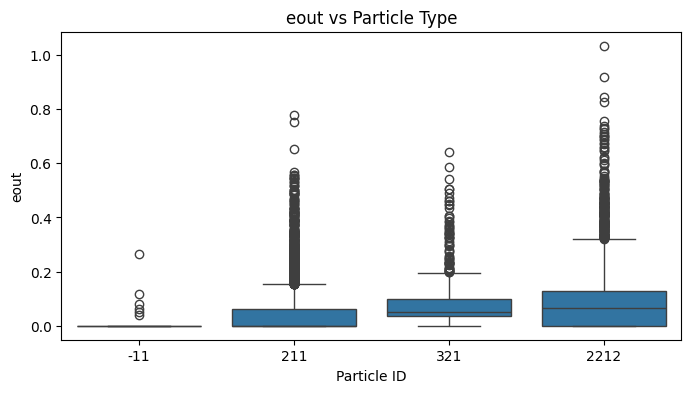

In [8]:
for col in detector_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='id', y=col, data=df.sample(10000))  # use a sample to speed up
    plt.title(f'{col} vs Particle Type')
    plt.xlabel('Particle ID')
    plt.ylabel(col)
    plt.show()


## PCA: Dimensionality Reduction for Visualization

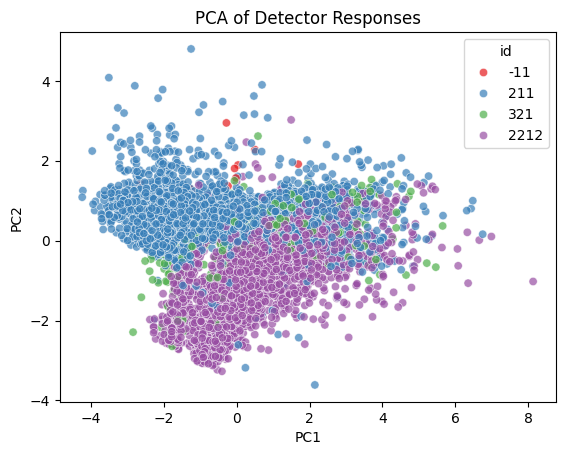

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[detector_columns]
y = df['id']

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['id'] = y.values

sns.scatterplot(data=pca_df.sample(10000), x='PC1', y='PC2', hue='id', palette='Set1', alpha=0.7)
plt.title('PCA of Detector Responses')
plt.show()


#### PCA helps visualize how well particles can be separated based on detector signals.If clusters form in the 2D PCA plot, it shows that the detector data contains useful patterns to distinguish between particles.

##### The Particle Identification dataset consists of four particle types—positron, pion, kaon, and proton—distinguished using six detector signals. Analysis shows that the dataset is imbalanced, with some particles occurring more frequently than others. Many detector responses contain zero values due to inefficiencies or limited detector coverage, which should be carefully considered during preprocessing. Despite this, the detector features are largely uncorrelated, indicating that each contributes unique information. Visualizations reveal distinct response patterns for each particle type, especially for protons and positrons, suggesting strong class separability. PCA further confirms that the data has underlying structure suitable for classification, with observable clustering in reduced dimensions. Overall, the dataset is well-suited for supervised learning tasks, though attention must be given to class imbalance, zero values, and data scaling.